In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

In [2]:
telecom=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom.columns=telecom.columns.str.lower() # converting column names to lower case

In [6]:
telecom.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
telecom=telecom.drop(columns='customerid') # this particular column is not needed

In [8]:
telecom['churn'].value_counts() # There is an imbalance in the data

No     5174
Yes    1869
Name: churn, dtype: int64

In [9]:
telecom['churn'].value_counts(normalize=1) # in terms of percentage

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

In [10]:
pd.crosstab(telecom.gender,telecom.churn) # Genderwise distribution

churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [11]:
telecom.groupby('seniorcitizen')['churn'].value_counts() # Agewise distribution

seniorcitizen  churn
0              No       4508
               Yes      1393
1              No       666 
               Yes      476 
Name: churn, dtype: int64

In [12]:
telecom.groupby('phoneservice')['churn'].value_counts()  

phoneservice  churn
No            No       512 
              Yes      170 
Yes           No       4662
              Yes      1699
Name: churn, dtype: int64

Most of the customers who have churned have phone service

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
pd.crosstab(telecom.contract,telecom.churn) # Contract wise distribution of churn

churn,No,Yes
contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


Most of the customers who have churned have been using month-to-month contract

### Contract wise distribution of customers who have churned along with gender differenciation

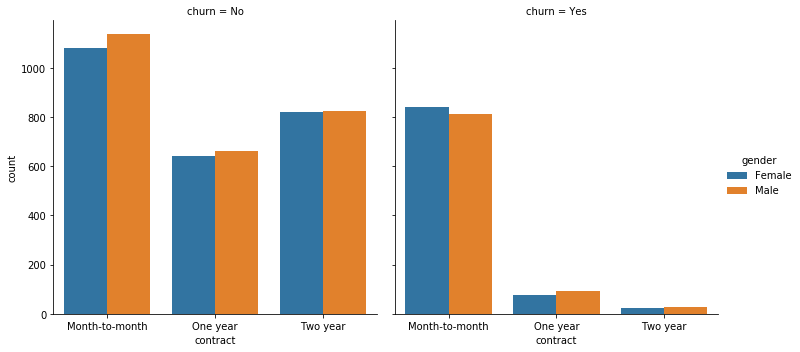

In [15]:
sns.catplot(x='contract',data=telecom,hue='gender',col='churn',kind='count')

### Gender wise distribution of customers who have churned along with age (senior citizenship) differenciation

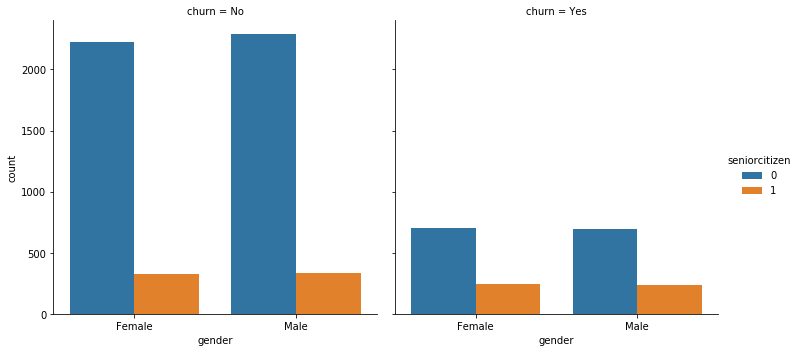

In [16]:
sns.catplot(x='gender',data=telecom,hue='seniorcitizen',col='churn',kind='count')

The churn rate is almost similar in male & female, and also in senior citizen & others

In [17]:
telecom['totalcharges'].describe()

count     7043
unique    6531
top           
freq      11  
Name: totalcharges, dtype: object

This shows that the column is still an object type. It has to be converted to numeric type.

In [18]:
telecom['totalcharges']=pd.to_numeric(telecom.totalcharges,errors='coerce') #converting it to a numerical column

In [19]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
seniorcitizen       7043 non-null int64
partner             7043 non-null object
dependents          7043 non-null object
tenure              7043 non-null int64
phoneservice        7043 non-null object
multiplelines       7043 non-null object
internetservice     7043 non-null object
onlinesecurity      7043 non-null object
onlinebackup        7043 non-null object
deviceprotection    7043 non-null object
techsupport         7043 non-null object
streamingtv         7043 non-null object
streamingmovies     7043 non-null object
contract            7043 non-null object
paperlessbilling    7043 non-null object
paymentmethod       7043 non-null object
monthlycharges      7043 non-null float64
totalcharges        7032 non-null float64
churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


The column 'totalcharges' have some null values.

In [20]:
telecom[telecom.totalcharges.isnull()]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [21]:
telecom.groupby('gender')['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,3488.0,65.204243,30.061341,18.40,35.900,70.65,89.850,118.75
Male,3555.0,64.327482,30.116093,18.25,35.225,70.10,89.875,118.35


The average monthly charges for male and female are almost the same.

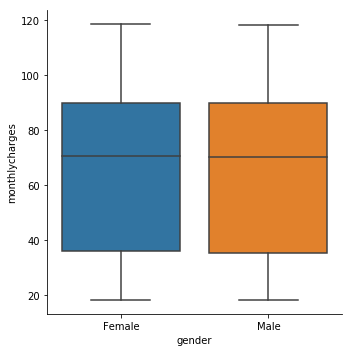

In [22]:
sns.catplot(x='gender',data=telecom,y='monthlycharges',kind='box')

There are no outliers in the monthly charges.

In [23]:
telecom.groupby('seniorcitizen')['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,,,,,,,,
0,5901.0,61.847441,30.316041,18.25,25.60,65.80,86.700,118.75
1,1142.0,79.820359,23.764027,18.95,70.15,84.85,98.075,117.45


The average monthly expenses for senior citizens are higher than that of the others.

In [24]:
telecom.groupby('churn')['monthlycharges'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


The average monthly expenses of the churned customers are higher than that of the customers who did not churn, eventhough their numbers are less.

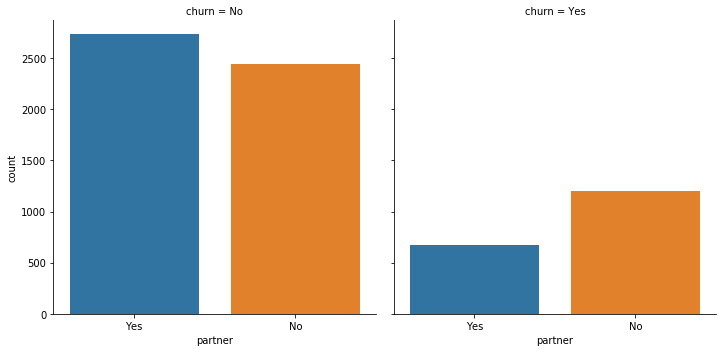

In [25]:
sns.catplot(x='partner',data=telecom,col='churn',kind='count')

The churn rate is higher for those people who customers without partners.

### Distribution of customer tenure

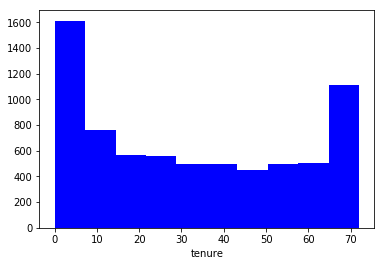

In [26]:
plt.xlabel('tenure')
plt.hist(telecom['tenure'],color='blue')
plt.show()

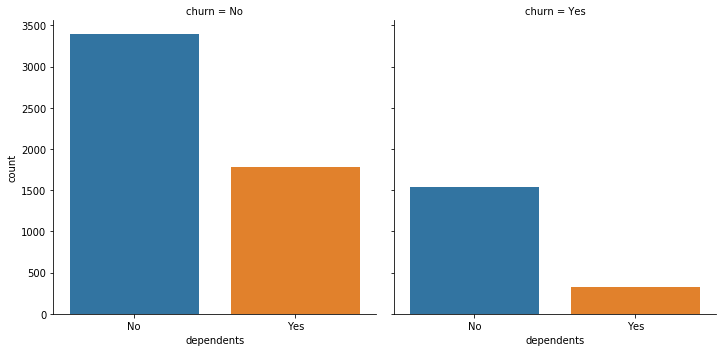

In [27]:
sns.catplot(x='dependents',data=telecom,col='churn',kind='count')

The churn rate is higher for those customers without dependents. The customers without dependents are higher.

### Distribution of monthly charges

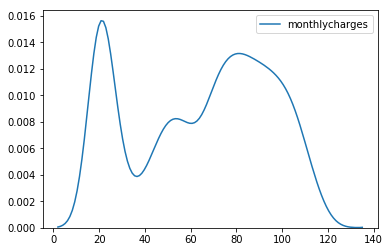

In [28]:
sns.kdeplot(telecom.monthlycharges)

### Relationship between monthly charges and total charges

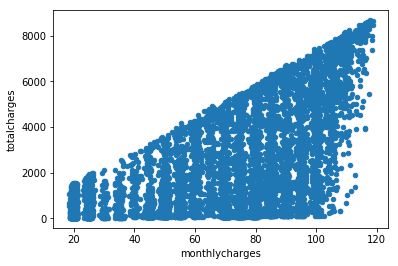

In [29]:
telecom[['monthlycharges', 'totalcharges']].plot.scatter(x = 'monthlycharges',y='totalcharges')

There is a positive relationship between monthly charges and total charges.

### Data processing

In [30]:
telecom.dropna(inplace=True) # Dropping all the rows which have NaN values

In [31]:
telecom=telecom.reset_index(drop=True) # resetting the index to avoid missed rows

In [32]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender              7032 non-null object
seniorcitizen       7032 non-null int64
partner             7032 non-null object
dependents          7032 non-null object
tenure              7032 non-null int64
phoneservice        7032 non-null object
multiplelines       7032 non-null object
internetservice     7032 non-null object
onlinesecurity      7032 non-null object
onlinebackup        7032 non-null object
deviceprotection    7032 non-null object
techsupport         7032 non-null object
streamingtv         7032 non-null object
streamingmovies     7032 non-null object
contract            7032 non-null object
paperlessbilling    7032 non-null object
paymentmethod       7032 non-null object
monthlycharges      7032 non-null float64
totalcharges        7032 non-null float64
churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [33]:
X=telecom.iloc[:,:-1] # Extracting all columns except the last column which is the target variable 'churn'

In [34]:
X.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [35]:
df = pd.get_dummies(X) # Getting dummies for all the categorical variables
df.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [36]:
telecom['churn'].replace('Yes',1,inplace=True)

In [37]:
telecom['churn'].replace('No',0,inplace=True)

In [38]:
telecom.sample(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
5005,Male,1,No,No,23,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),34.65,768.45,0
3180,Female,1,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,25.05,25.05,1
5100,Female,0,No,No,23,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),49.70,1081.25,0
3066,Male,0,Yes,Yes,47,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.50,4318.35,0
5455,Male,0,No,No,25,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.75,499.40,0


In [39]:
df['churn']=telecom['churn']

In [40]:
df.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1


### Normalizing the numerical variables between the range of 0 & 1

In [41]:
A=df[['tenure','monthlycharges','totalcharges']] # extracting only the numerical columns to a new dataframe

In [42]:
from sklearn import preprocessing

In [43]:
x=A.values

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()

In [45]:
x_scaled = min_max_scaler.fit_transform(x)

In [46]:
df_normalized = pd.DataFrame(x_scaled,columns='tenure monthlycharges totalcharges'.split())

In [47]:
df_normalized.sample(5)

,tenure,monthlycharges,totalcharges
4698,0.000000,0.260697,0.002960
4340,0.690141,0.815423,0.579235
954,0.042254,0.383085,0.026119
471,0.000000,0.365672,0.004177
4881,0.647887,0.947264,0.611470


In [48]:
df.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges',
       'gender_Female', 'gender_Male', 'partner_No', 'partner_Yes',
       'dependents_No', 'dependents_Yes', 'phoneservice_No',
       'phoneservice_Yes', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No',
       'onlinesecurity_No internet service', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_No internet service', 'deviceprotection_Yes',
       'techsupport_No', 'techsupport_No internet service', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', '

In [49]:
df[['tenure','monthlycharges','totalcharges']]=df_normalized[['tenure','monthlycharges','totalcharges']] # replacing the columns with the new ones

In [50]:
df.sample(5)

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn
1908,0,0.901408,0.768657,0.707945,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0
3653,0,0.929577,0.911940,0.843942,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0
5769,0,0.000000,0.020398,0.000173,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0
3720,0,0.211268,0.704478,0.164990,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1
4593,0,0.619718,0.849751,0.545702,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0


In [51]:
df_proc=df.copy()

### Splitting into train & test data

In [52]:
X=df_proc.iloc[:,:-1]

In [53]:
X.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# create training and testing variables with a test size of 0.2
X_train, X_test, y_train, y_test = train_test_split(X,df_proc['churn'], test_size=0.2,random_state=42,stratify=df_proc['churn'])

In [56]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 45) (5625,)
(1407, 45) (1407,)


### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [58]:
model = LogisticRegression()

In [59]:
model.fit(X_train,y_train)

C:\Users\VAISHAK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
predicted_class=model.predict(X_test)

In [61]:
accuracy_score(y_test,predicted_class)*100

80.45486851457001

In [62]:
print(classification_report(y_test,predicted_class))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [63]:
confusion_matrix(y_test, predicted_class)

array([[919, 114],
       [161, 213]], dtype=int64)

#### Features contribution

In [64]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)

In [65]:
weights.shape

(45,)

#### Showing the first and last 15 variables based on their contributions to the prediction

In [66]:
print(weights.sort_values(ascending=False)[:15])

totalcharges                      1.215071
contract_Month-to-month           0.678332
internetservice_Fiber optic       0.470380
paymentmethod_Electronic check    0.221362
onlinesecurity_No                 0.214138
techsupport_No                    0.191195
seniorcitizen                     0.188028
streamingtv_Yes                   0.159455
streamingmovies_Yes               0.145824
onlinebackup_No                   0.091951
multiplelines_Yes                 0.073600
paperlessbilling_Yes              0.072593
dependents_No                     0.045621
multiplelines_No phone service    0.033427
phoneservice_No                   0.033427
dtype: float64


In [67]:
print(weights.sort_values(ascending=False)[-15:])

streamingtv_No internet service           -0.162939
internetservice_No                        -0.162939
onlinesecurity_No internet service        -0.162939
techsupport_No internet service           -0.162939
techsupport_Yes                           -0.172133
paymentmethod_Bank transfer (automatic)   -0.173051
phoneservice_Yes                          -0.177304
dependents_Yes                            -0.189499
onlinesecurity_Yes                        -0.195077
paperlessbilling_No                       -0.216471
multiplelines_No                          -0.250904
monthlycharges                            -0.403517
internetservice_DSL                       -0.451319
contract_Two year                         -0.722443
tenure                                    -3.011636
dtype: float64


### SVM

In [68]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
svmpred = svclassifier.predict(X_test)

In [70]:
accuracy_score(y_test,svmpred)*100

79.74413646055437

In [71]:
confusion_matrix(y_test, svmpred)

array([[915, 118],
       [167, 207]], dtype=int64)

Accuracy has decreased compared to the logistic regression model

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rdfmodel = RandomForestClassifier(n_estimators=750,random_state=45)

In [74]:
rdfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=None,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

In [75]:
rdfpredicted_class=rdfmodel.predict(X_test)

In [76]:
accuracy_score(y_test,rdfpredicted_class)*100

78.53589196872778

The accuracy is still lower than that of logistic regression

### Neural Networks

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
nnmodel = MLPClassifier(hidden_layer_sizes=(200,100),random_state=45)

In [79]:
nnmodel.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=45, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [80]:
nnpredicted_class=nnmodel.predict(X_test)

In [81]:
accuracy_score(y_test,nnpredicted_class)*100

75.12437810945273

#### The best model is the logistic regression model with an accuracy of 80.45%

### K-means clustering

In [82]:
from sklearn.cluster import KMeans

In [83]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

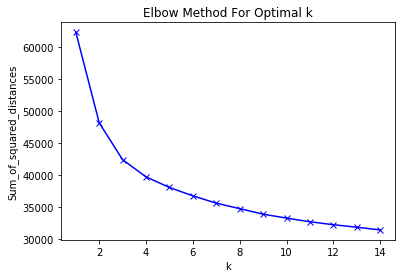

In [84]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### 4 seems to be the optimal number of clusters according to the Elbow method

In [85]:
kmeans = KMeans(n_clusters = 4) 
kmeans.fit(X) 

labels=kmeans.labels_

In [86]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3]), array([1571, 2106, 1520, 1835], dtype=int64))

In [87]:
centers = kmeans.cluster_centers_

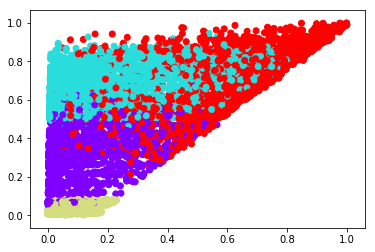

In [88]:
plt.scatter(X['totalcharges'],X['monthlycharges'],c=labels,cmap='rainbow')